# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
# Suppress warnings to keep the output clean
warnings.filterwarnings("ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type

categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_cols] = df[categorical_cols].astype('category')

In [6]:
df.dtypes

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [7]:
# Calculate time taken in minutes

df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [8]:
df

market_id          created_at actual_delivery_time  \
0            1.0 2015-02-06 22:24:17  2015-02-06 23:11:17   
1            2.0 2015-02-10 21:49:25  2015-02-10 22:33:25   
2            2.0 2015-02-16 00:11:35  2015-02-16 01:06:35   
3            1.0 2015-02-12 03:36:46  2015-02-12 04:35:46   
4            1.0 2015-01-27 02:12:36  2015-01-27 02:58:36   
...          ...                 ...                  ...   
175772       1.0 2015-02-17 00:19:41  2015-02-17 01:02:41   
175773       1.0 2015-02-13 00:01:59  2015-02-13 01:03:59   
175774       1.0 2015-01-24 04:46:08  2015-01-24 05:32:08   
175775       1.0 2015-02-01 18:18:15  2015-02-01 19:03:15   
175776       1.0 2015-02-08 19:24:33  2015-02-08 20:01:33   

       store_primary_category order_protocol  total_items  subtotal  \
0                           4            1.0            4      3441   
1                          46            2.0            1      1900   
2                          36            3.0            4      4771   
3                          38            1.0            1      1525   
4                          38            1.0            2      3620   
...                       ...            ...          ...       ...   
175772                     28            4.0            3      1389   
175773                     28            4.0            6      3010   
175774                     28            4.0            5      1836   
175775                     58            1.0            1      1175   
175776                     58            1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                        33.0                14.0                      21.0   
1                         1.0                 2.0                       2.0   
2                         8.0                 6.0                      18.0   
3                         5.0                 6.0                       8.0   
4                         5.0                 5.0                       7.0   
...                       ...                 ...                       ...   
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance  time_taken  
0          34.44        47.0  
1          27.60        44.0  
2          11.56        55.0  
3          31.80        59.0  
4           8.20        46.0  
...          ...         ...  
175772     13.24        43.0  
175773     36.60        62.0  
175774     31.80        46.0  
175775     15.36        45.0  
175776      5.36        37.0  

[175777 rows x 15 columns]

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [9]:
# Extract the hour and day of week from the 'created_at' timestamp

df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['order_dayofweek'].isin([5, 6]).astype('category')


In [10]:
# Drop unnecessary columns

df = df.drop(['created_at', 'actual_delivery_time'], axis=1)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [11]:
# Define target variable (y) and features (X)

y = df['time_taken']
X = df.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [12]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [13]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'distance', 'order_hour'
]
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'order_dayofweek', 'isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

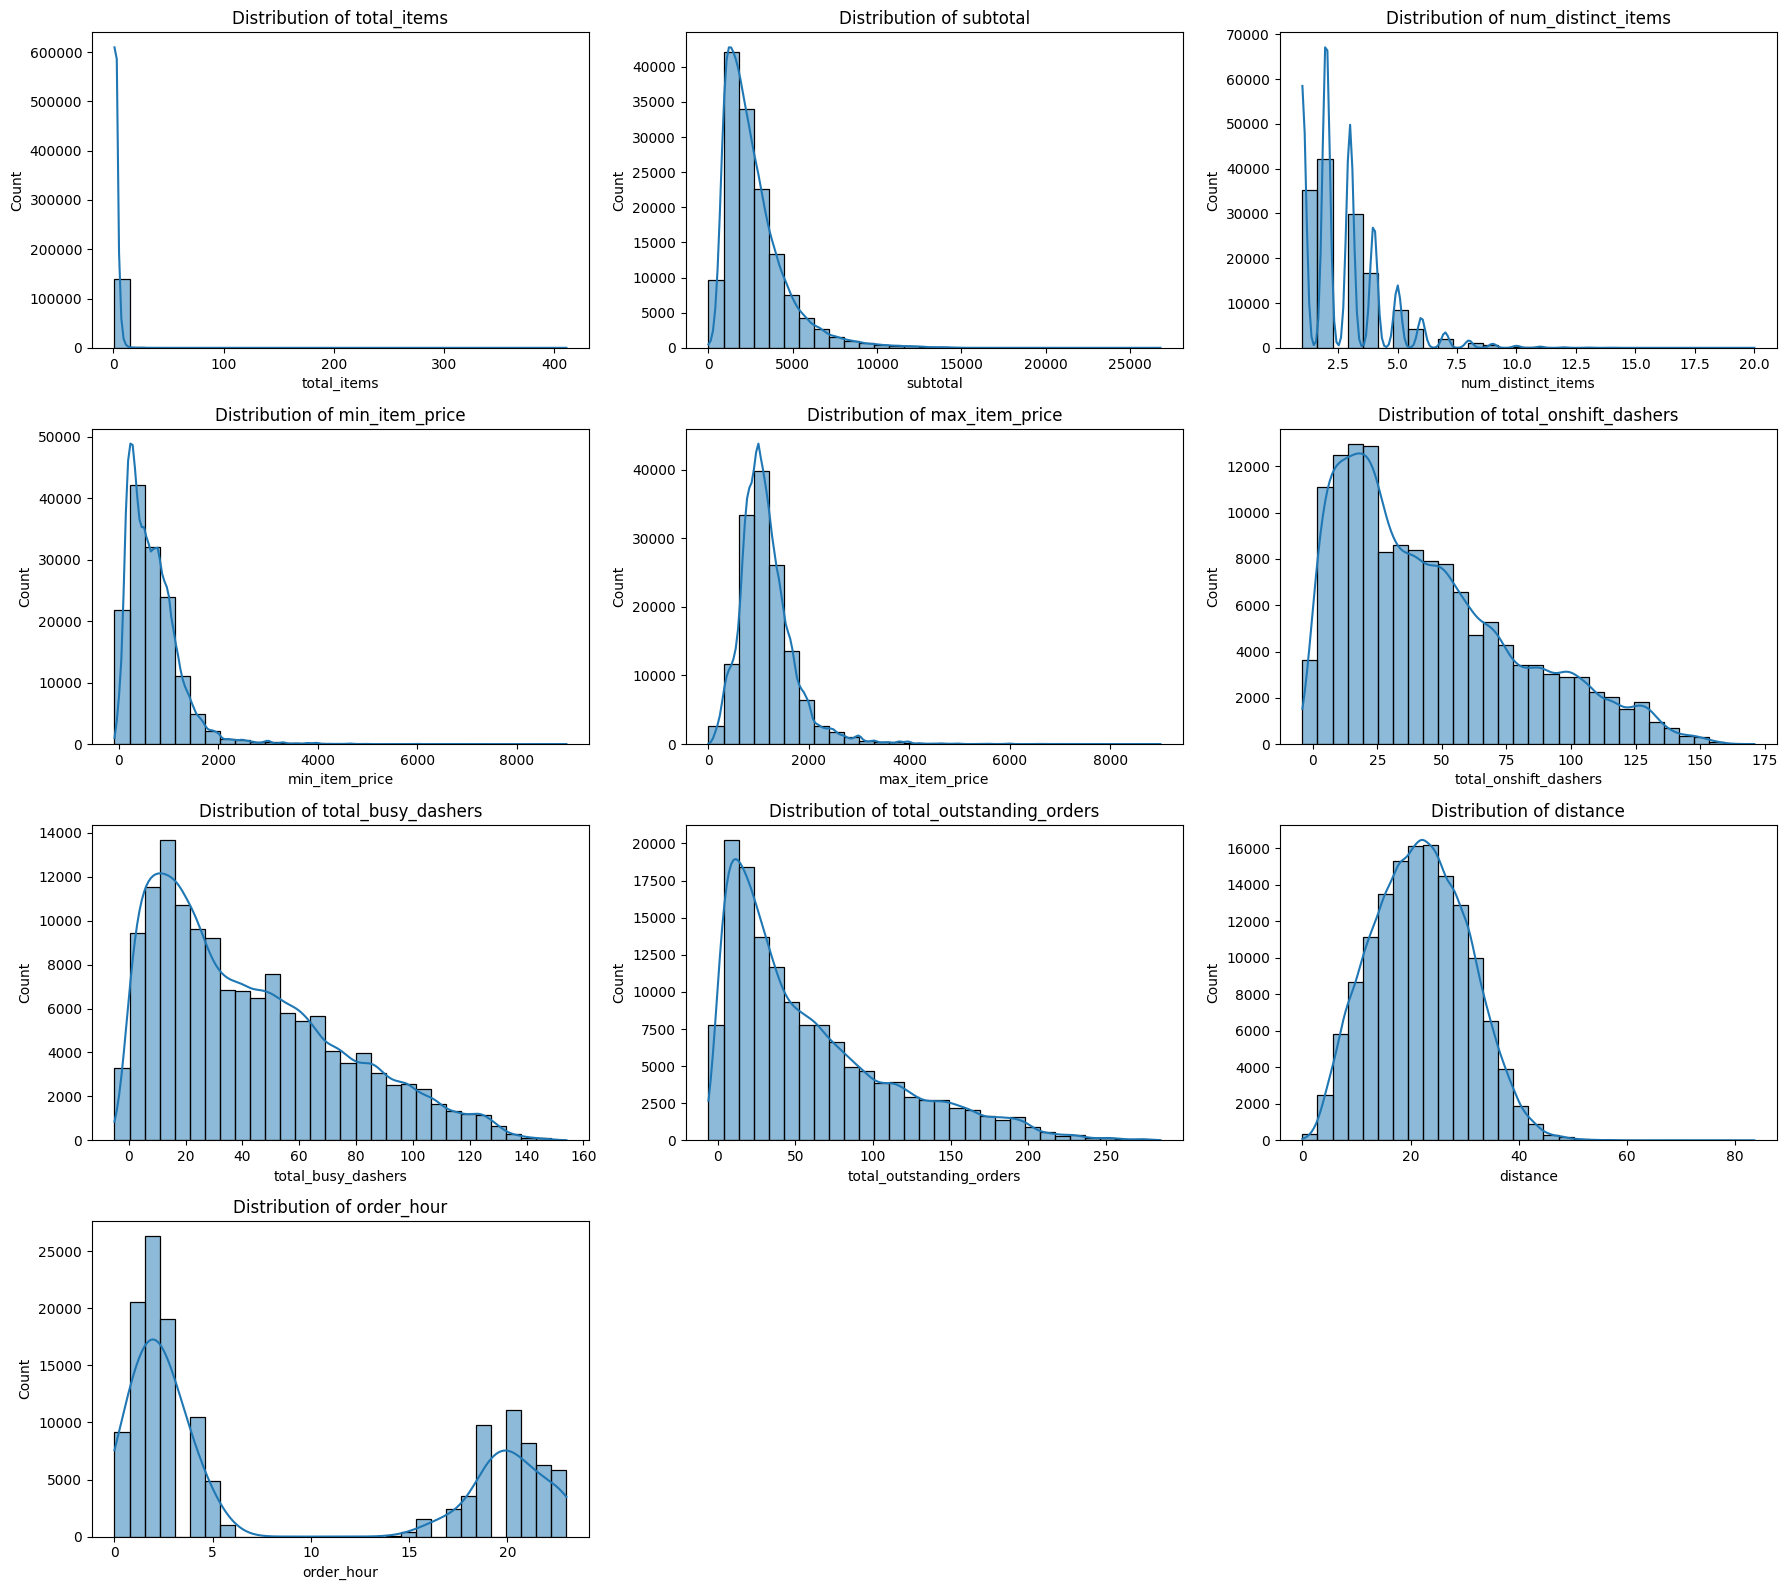

In [14]:
# Plot distributions for all numerical columns

cols = 3
rows = (len(numerical_cols) // cols) + (len(numerical_cols) % cols > 0)

plt.figure(figsize=(cols * 6, rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [15]:
# Distribution of categorical columns (3 plots per row)

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.countplot(x=X_train[col], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [16]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=30, kde=True)
plt.title('Distribution of time_taken (Training Set)')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Count')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [17]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(18, 20))
cols = 3
rows = (len(numerical_cols) // cols) + (len(numerical_cols) % cols > 0)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.6)
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (min)')

plt.tight_layout()
plt.show()

In [18]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(14, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train)
plt.title('Distribution of time_taken by Order Hour (Training Set)')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

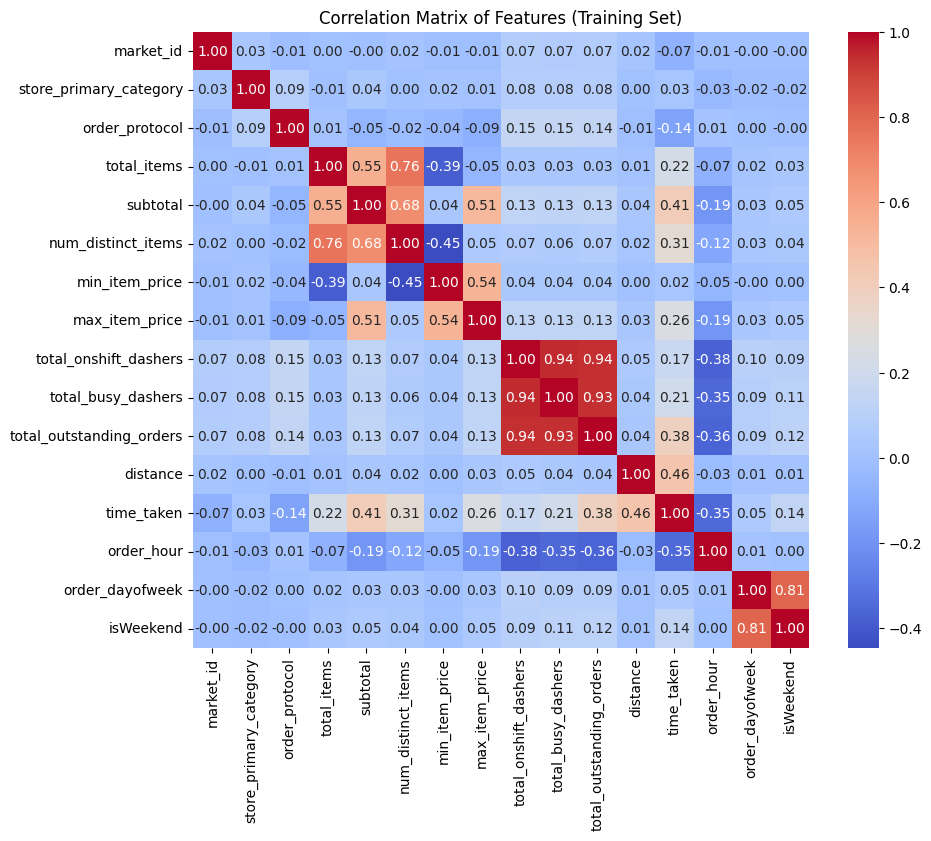

In [19]:
# Plot the heatmap of the correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Features (Training Set)')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [20]:
X_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'order_dayofweek',
       'isWeekend'],
      dtype='object')

In [21]:
# Drop 3-5 weakly correlated columns from training dataset

weak_features = [
    'market_id',
    'store_primary_category',
    'min_item_price',
    'order_dayofweek',
    'order_protocol',
    'order_dayofweek'
]

X_train = X_train.drop(columns=weak_features)
X_test = X_test.drop(columns=weak_features)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [22]:
X_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')

In [23]:
numerical_cols = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'distance'
]
categorical_cols = [
    'order_hour',
    'isWeekend'
]

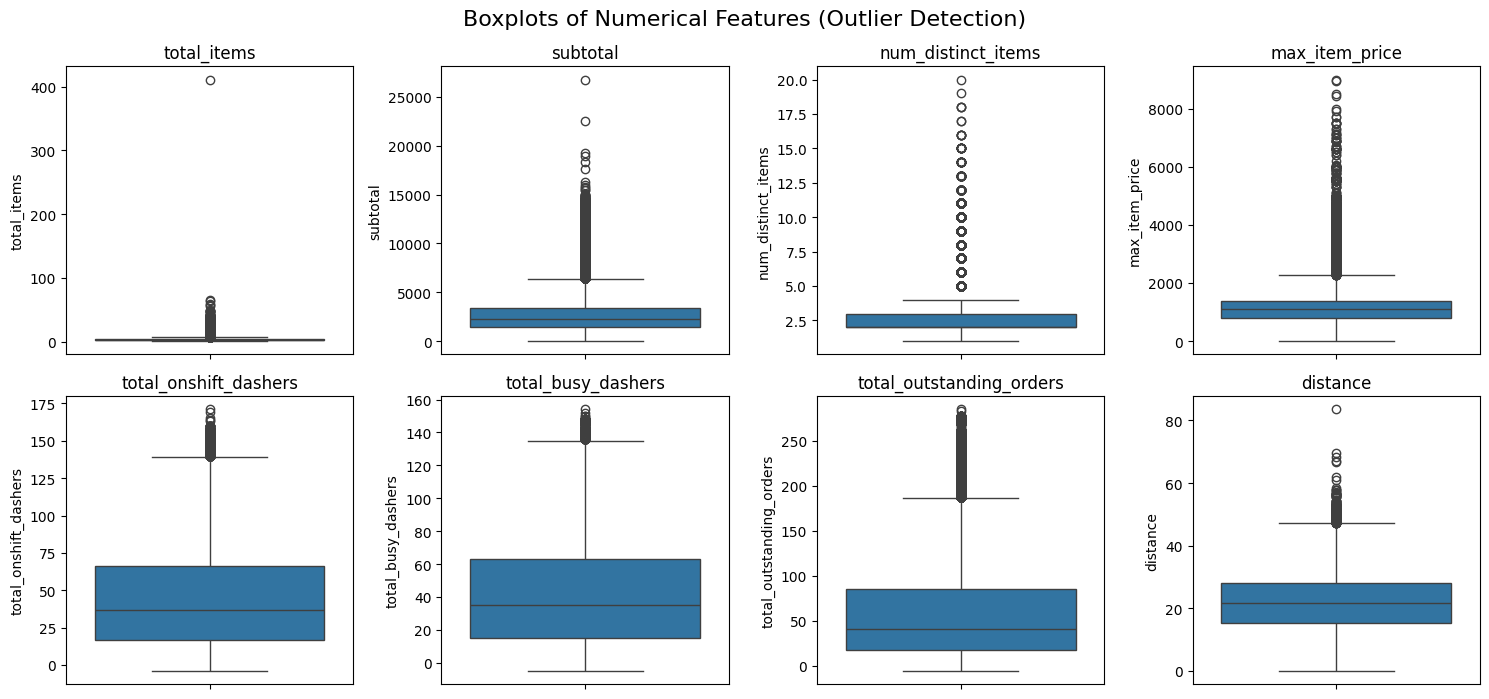

In [24]:
# Boxplot for time_taken

plt.figure(figsize=(15, 10))

# Plot a boxplot for each feature
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=X_train[column])
    plt.title(column)
    plt.tight_layout()

plt.suptitle('Boxplots of Numerical Features (Outlier Detection)', fontsize=16, y=1.02)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [25]:
# Remove rows with negative values in any of the numerical columns from X_train and X_test
for col in numerical_cols:
    X_train = X_train[X_train[col] >= 0]
    X_test = X_test[X_test[col] >= 0]

In [26]:
# Align y_train and y_test with the indexes of X_train and X_test
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

In [27]:
# Handle outliers

cols_to_cap = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'max_item_price',
    'total_outstanding_orders'
]

def cap_upper(df, cols, upper_percentile=0.99):
    df_capped = df.copy()
    for col in cols:
        upper = df[col].quantile(upper_percentile)
        df_capped[col] = np.minimum(df[col], upper)
    return df_capped

X_train_transformed = cap_upper(X_train, cols_to_cap)
X_test_transformed = cap_upper(X_test, cols_to_cap)


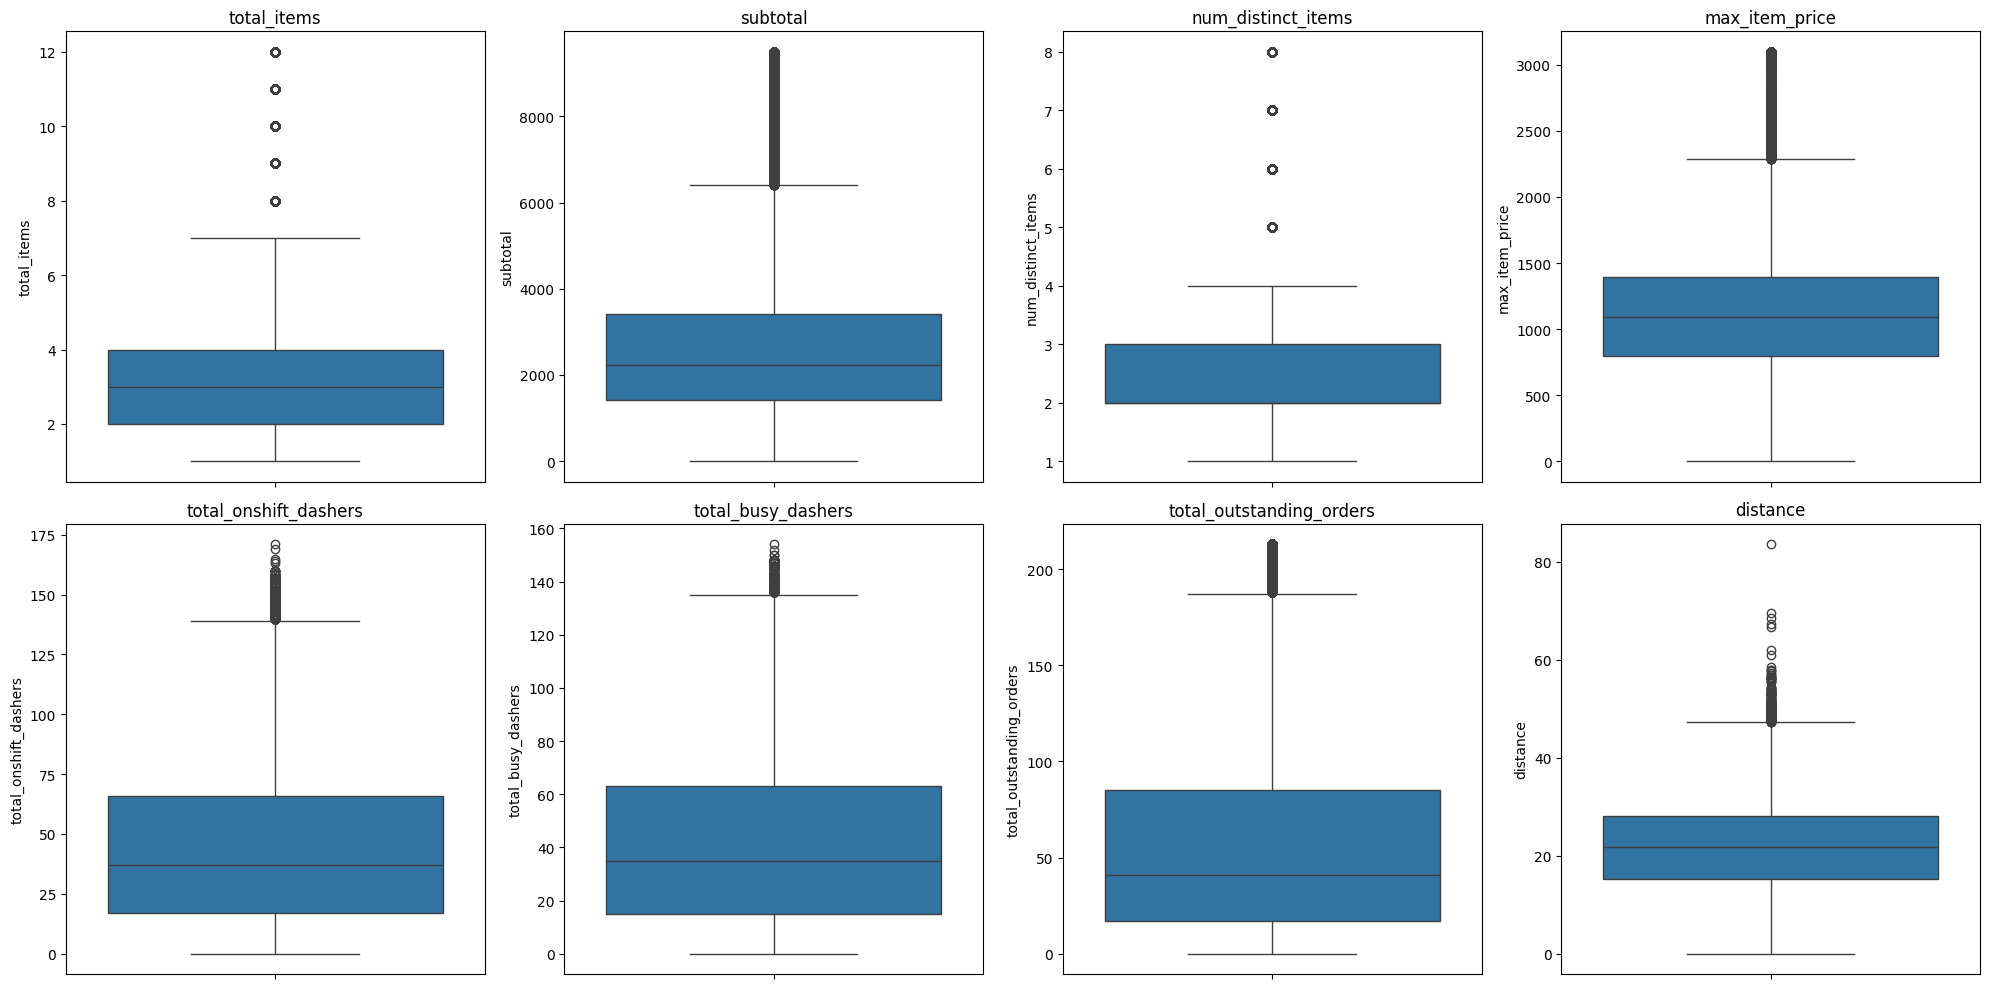

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=X_train_transformed[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [29]:
# Define numerical and categorical columns for easy EDA and data manipulation

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['order_hour', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

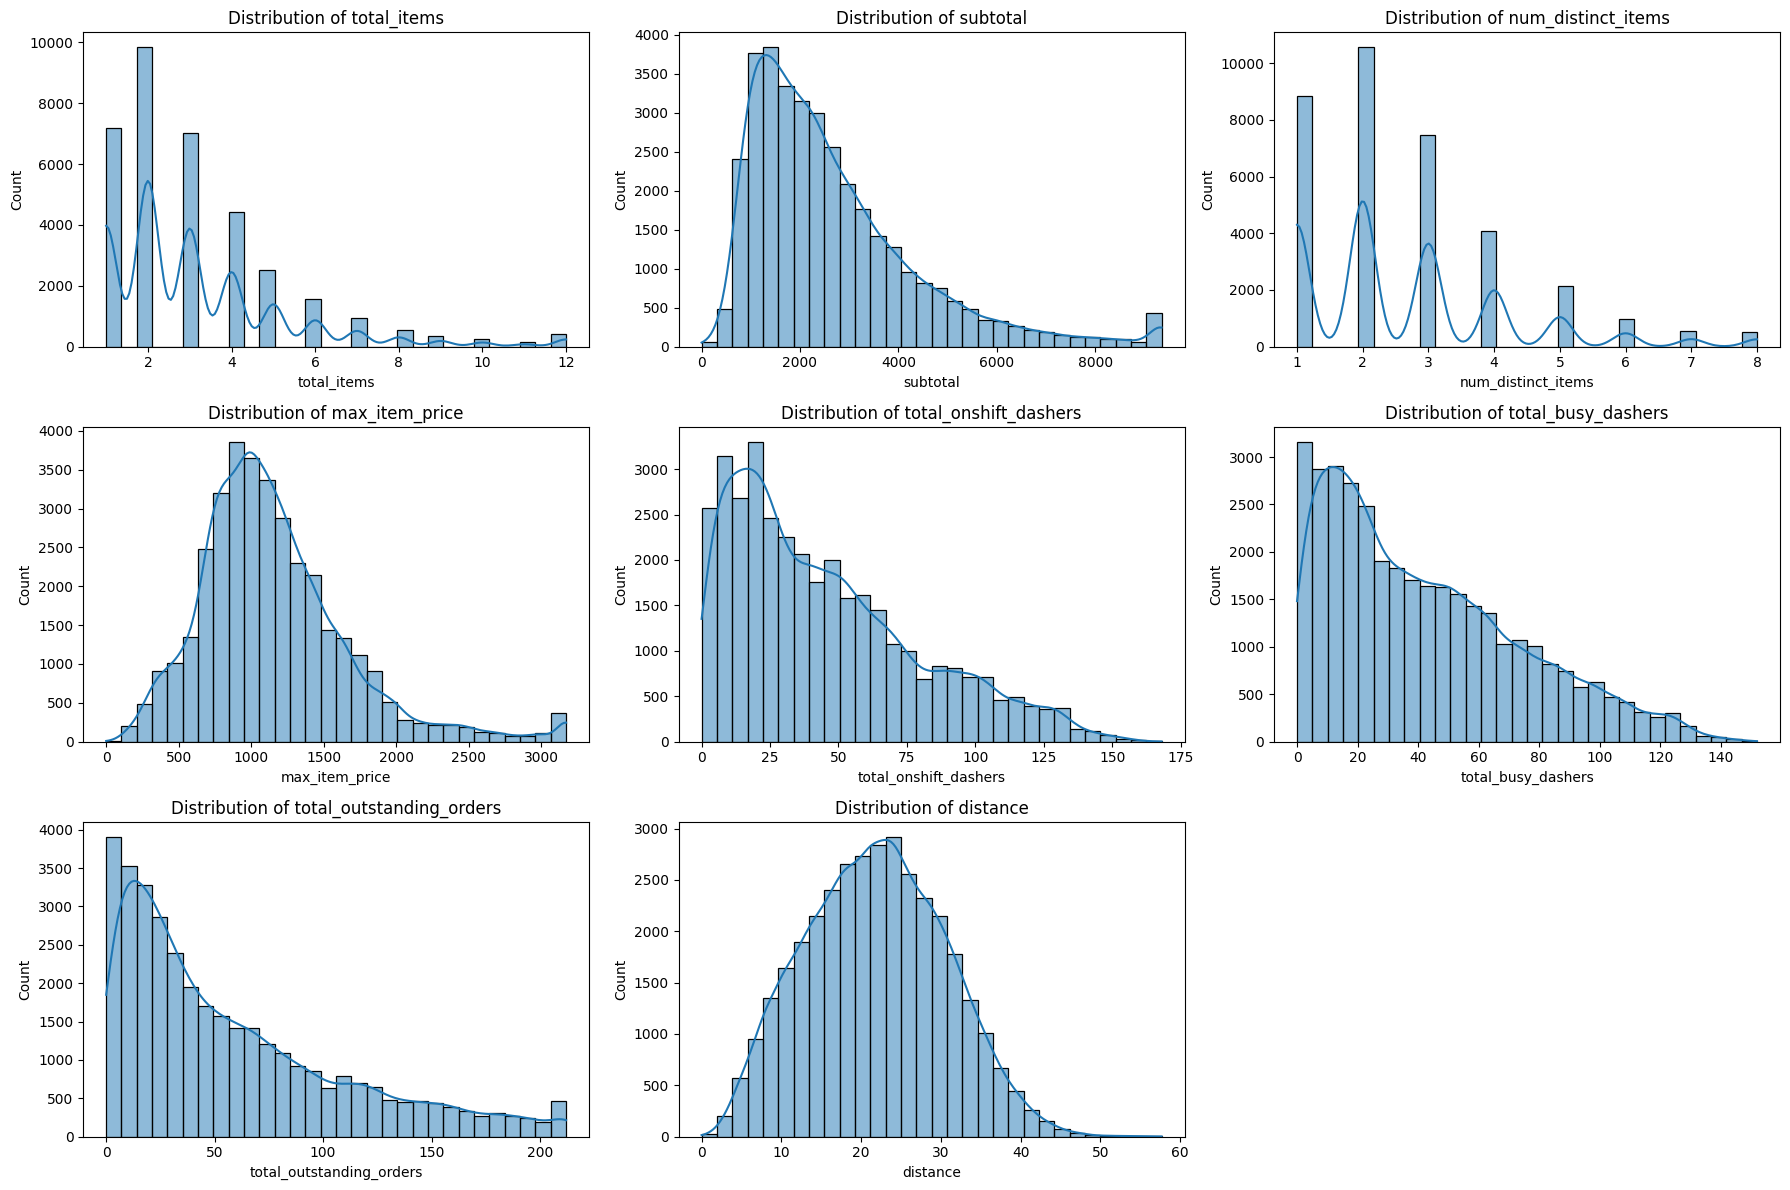

In [30]:
# Plot distributions for all numerical columns

cols = 3
rows = (len(numerical_cols) // cols) + (len(numerical_cols) % cols > 0)

plt.figure(figsize=(cols * 6, rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(X_test_transformed[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

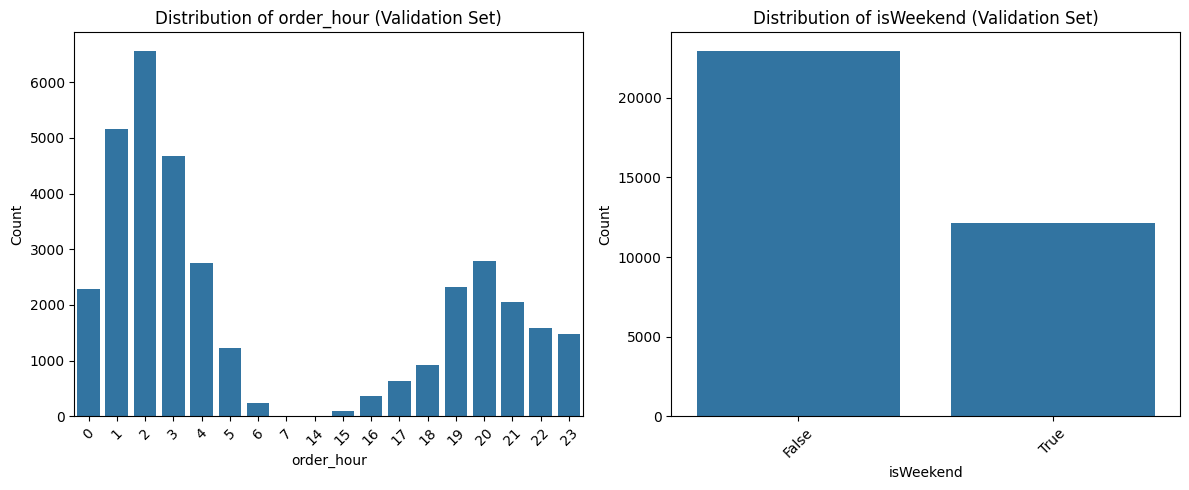

In [31]:
# Distribution of categorical columns

n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.countplot(x=X_test_transformed[col], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} (Validation Set)')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

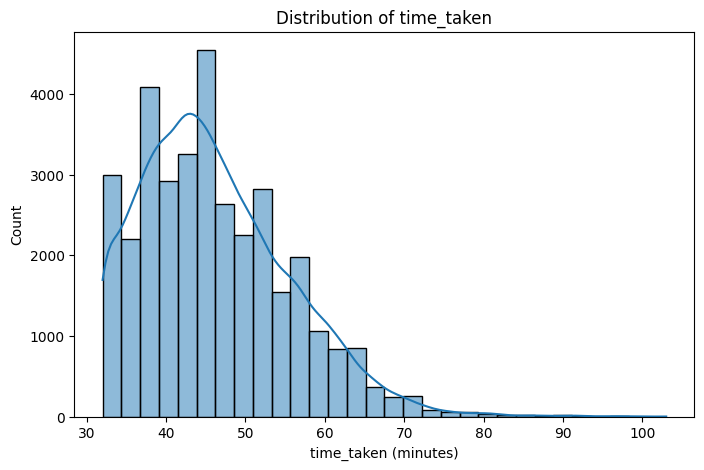

In [32]:
# Distribution of time_taken

plt.figure(figsize=(8, 5))
sns.histplot(y_test, bins=30, kde=True)
plt.title('Distribution of time_taken')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Count')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [33]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=X_train_transformed[col], y=y_train, alpha=0.5)
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [34]:
# Drop the weakly correlated columns from training dataset

df_train = X_train_transformed.copy()
df_train['time_taken'] = y_train.loc[X_train_transformed.index]

plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Features and Target (Training Set)')
plt.show()

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [35]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [36]:
# Apply scaling to the numerical columns

scaler = MinMaxScaler()
X_train_scaled = X_train_transformed.copy()
X_test_scaled = X_test_transformed.copy()

# Scale only the numerical columns
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_transformed[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_transformed[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [37]:
# Create/Initialise the model

model = LinearRegression()

In [38]:
# Train the model using the training data

model.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
# Make predictions
y_pred = model.predict(X_test_scaled)


In [40]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

MAE: 2.53
MSE: 12.37
RMSE: 3.52
R^2 Score: 0.8587


In [41]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140556 entries, 102712 to 121958
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   total_items               140556 non-null  float64 
 1   subtotal                  140556 non-null  float64 
 2   num_distinct_items        140556 non-null  float64 
 3   max_item_price            140556 non-null  float64 
 4   total_onshift_dashers     140556 non-null  float64 
 5   total_busy_dashers        140556 non-null  float64 
 6   total_outstanding_orders  140556 non-null  float64 
 7   distance                  140556 non-null  float64 
 8   order_hour                140556 non-null  int32   
 9   isWeekend                 140556 non-null  category
dtypes: category(1), float64(8), int32(1)
memory usage: 10.3 MB


In [42]:
# One-hot encode 'isWeekend' and 'order_hour' in X_train_scaled and X_test_scaled

X_train_scaled_encoded = pd.get_dummies(X_train_scaled, columns=['isWeekend', 'order_hour'], drop_first=True)
X_test_scaled_encoded = pd.get_dummies(X_test_scaled, columns=['isWeekend', 'order_hour'], drop_first=True)

# Align columns in case some categories are missing in test or train
X_train_scaled_encoded, X_test_scaled_encoded = X_train_scaled_encoded.align(X_test_scaled_encoded, join='left', axis=1, fill_value=0)

In [43]:
# Convert specified boolean columns to numeric (int) type in both train and test sets

cols_to_convert = [
    'isWeekend_True', 'order_hour_1', 'order_hour_2', 'order_hour_3', 'order_hour_4',
    'order_hour_5', 'order_hour_6', 'order_hour_7', 'order_hour_8',
    'order_hour_14', 'order_hour_15', 'order_hour_16', 'order_hour_17',
    'order_hour_18', 'order_hour_19', 'order_hour_20', 'order_hour_21',
    'order_hour_22', 'order_hour_23'
]

X_train_scaled_encoded[cols_to_convert] = X_train_scaled_encoded[cols_to_convert].astype(int)
X_test_scaled_encoded[cols_to_convert] = X_test_scaled_encoded[cols_to_convert].astype(int)

In [44]:
y_train = y_train.loc[X_train_scaled_encoded.index]
y_test = y_test.loc[X_test_scaled_encoded.index]

X_train_scaled_encoded = X_train_scaled_encoded.reset_index(drop=True)
y_train_encoded = y_train.reset_index(drop=True)

X_test_scaled_encoded = X_test_scaled_encoded.reset_index(drop=True)
y_test_encoded = y_test.reset_index(drop=True)

In [45]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_test_scaled_encoded)

# Fit the OLS model
ols_model = sm.OLS(y_test_encoded, X_train_sm).fit()

# Print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     8413.
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        11:16:56   Log-Likelihood:                -93684.
No. Observations:               35143   AIC:                         1.874e+05
Df Residuals:                   35116   BIC:                         1.877e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [46]:
# Loop through the number of features and test the model

# Identify order_hour dummy columns
order_hour_cols = [col for col in X_train_scaled_encoded.columns if col.startswith("order_hour_")]

# Identify remaining (non-order_hour) columns
other_cols = [col for col in X_train_scaled_encoded.columns if col not in order_hour_cols]

rfe_results = []

# Loop through different numbers of features (excluding order_hour)
for n_features in range(5, len(other_cols) + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train_scaled_encoded[other_cols], y_train_encoded)
    
    selected_features = list(X_train_scaled_encoded[other_cols].columns[rfe.support_])
    
    # Append all order_hour_* columns
    selected_features += order_hour_cols
    
    # Fit model
    model_rfe = LinearRegression()
    model_rfe.fit(X_train_scaled_encoded[selected_features], y_train_encoded)
    y_pred_rfe = model_rfe.predict(X_test_scaled_encoded[selected_features])
    
    # Evaluate
    mae_rfe = mean_absolute_error(y_test_encoded, y_pred_rfe)
    mse_rfe = mean_squared_error(y_test_encoded, y_pred_rfe)
    rmse_rfe = np.sqrt(mse_rfe)
    r2_rfe = r2_score(y_test_encoded, y_pred_rfe)
    
    rfe_results.append({
        'n_features': len(selected_features),
        'features': selected_features,
        'MAE': mae_rfe,
        'MSE': mse_rfe,
        'RMSE': rmse_rfe,
        'R2': r2_rfe
    })

rfe_results_df = pd.DataFrame(rfe_results)
rfe_results_df[['n_features', 'MAE', 'RMSE', 'R2']]

n_features       MAE      RMSE        R2
0          23  2.620873  3.580497  0.853513
1          24  2.620734  3.579054  0.853631
2          25  2.584332  3.544607  0.856435
3          26  2.503444  3.480657  0.861568
4          27  2.503222  3.480459  0.861584

In [47]:
selected_27_features = rfe_results_df[rfe_results_df['n_features'] == 27]['features'].values[0]
print(selected_27_features)

['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend_True', 'order_hour_1', 'order_hour_2', 'order_hour_3', 'order_hour_4', 'order_hour_5', 'order_hour_6', 'order_hour_7', 'order_hour_8', 'order_hour_14', 'order_hour_15', 'order_hour_16', 'order_hour_17', 'order_hour_18', 'order_hour_19', 'order_hour_20', 'order_hour_21', 'order_hour_22', 'order_hour_23']


In [48]:
# Build the final model with selected number of features

# Fit the final model using the selected 27 features
final_features = selected_27_features

final_model = LinearRegression()
final_model.fit(X_train_scaled_encoded[final_features], y_train_encoded)

# Predict on the test set
y_pred_final = final_model.predict(X_test_scaled_encoded[final_features])

In [56]:
# Evaluate the final model on the test set using common regression metrics


mae_final = mean_absolute_error(y_test_encoded, y_pred_final)
mse_final = mean_squared_error(y_test_encoded, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test_encoded, y_pred_final)

print(f"MAE: {mae_final:.4f}")
print(f"MSE: {mse_final:.4f}")
print(f"RMSE: {rmse_final:.4f}")
print(f"R^2 Score: {r2_final:.4f}")

MAE: 2.5032
MSE: 12.1136
RMSE: 3.4805
R^2 Score: 0.8616


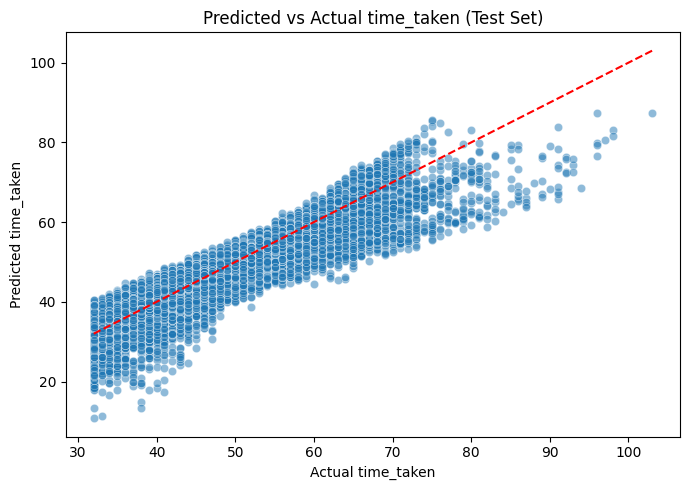

In [52]:
# Plot predicted vs actual values for the test set after linear regression

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test_encoded, y=y_pred_final, alpha=0.5)
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], color='red', linestyle='--')
plt.xlabel('Actual time_taken')
plt.ylabel('Predicted time_taken')
plt.title('Predicted vs Actual time_taken (Test Set)')
plt.tight_layout()
plt.show()

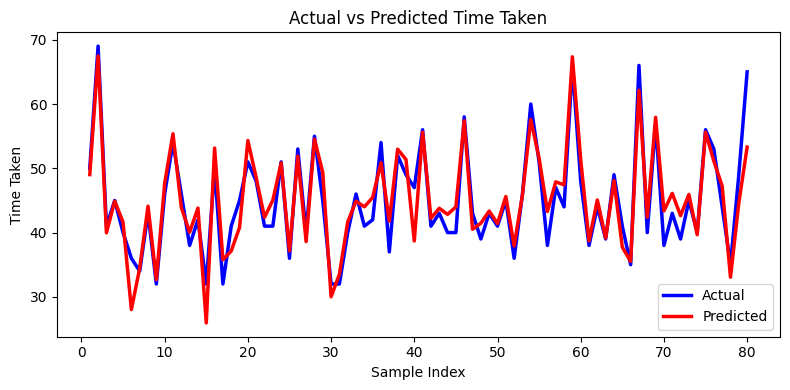

In [55]:
#Actual vs Predicted
# Choose first 80 records to plot
c = list(range(1, 81))

# Make sure all y values are sliced to 80 as well
actual = y_test.values[:80]
predicted = y_pred_final[:80]

# Plot
fig = plt.figure(figsize=(8, 4))
plt.plot(c, actual, color="blue", linewidth=2.5, linestyle="-", label="Actual")
plt.plot(c, predicted, color="red", linewidth=2.5, linestyle="-", label="Predicted")

plt.title('Actual vs Predicted Time Taken')
plt.xlabel('Sample Index')
plt.ylabel('Time Taken')
plt.legend()
plt.tight_layout()
plt.show()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

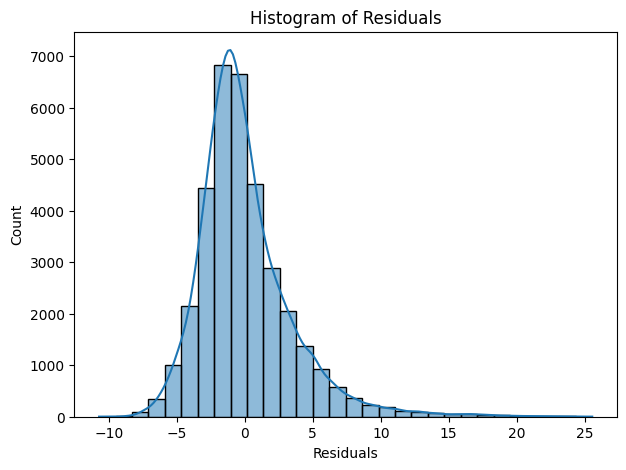

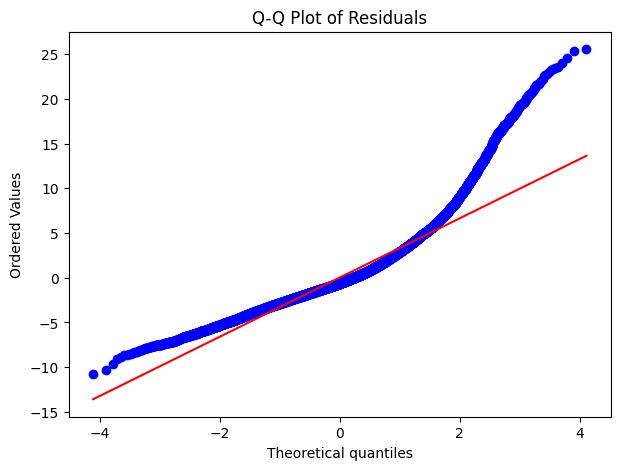

In [49]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import scipy.stats as stats

# Calculate residuals
residuals = y_test_encoded - y_pred_final

# Residuals vs Predicted values
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Histogram of residuals
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [50]:
# Compare the scaled vs unscaled features used in the final model
# Get coefficients from the final model (scaled features)
coef_scaled = pd.Series(final_model.coef_, index=final_features)

# For numerical features, convert scaled coefficients to unscaled using the scaler's min_ and scale_
numerical_final = [col for col in final_features if col in scaler.feature_names_in_]
unscaled_coefs = {}
for col in numerical_final:
    # The effect of a unit increase in the original feature
    unscaled_coefs[col] = coef_scaled[col] / scaler.scale_[list(scaler.feature_names_in_).index(col)]

# Create a DataFrame for comparison
coef_df = pd.DataFrame({
    'Scaled Coefficient': coef_scaled[numerical_final],
    'Unscaled Coefficient': pd.Series(unscaled_coefs)
})

print("Coefficient comparison for numerical features:")
display(coef_df)

# For categorical features (dummies), the scaled coefficient is the effect of being in that category vs the reference
cat_features = [col for col in final_features if col not in numerical_final]
if cat_features:
    print("\nCategorical feature coefficients (effect vs reference):")
    display(coef_scaled[cat_features])

# Interpretation example for one feature
print("\nInterpretation example:")
feature = coef_df.index[0]
print(f"- For '{feature}': A one unit increase in the original (unscaled) feature increases the predicted delivery time by {coef_df.loc[feature, 'Unscaled Coefficient']:.3f} minutes, holding other features constant.")


Coefficient comparison for numerical features:


Scaled Coefficient  Unscaled Coefficient
total_items                        -0.398304             -4.381340
subtotal                           12.727165         120908.072000
num_distinct_items                  3.567209             24.970462
max_item_price                      2.374268           7357.855381
total_onshift_dashers             -64.727329         -11068.373310
total_busy_dashers                -22.098963          -3403.240376
total_outstanding_orders           75.678462          16119.512302
distance                           39.787342           3323.038781


Categorical feature coefficients (effect vs reference):


isWeekend_True    1.435509
order_hour_1      0.671164
order_hour_2      0.654805
order_hour_3      0.253337
order_hour_4     -1.198580
order_hour_5     -2.101947
order_hour_6     -2.471315
order_hour_7     -3.036210
order_hour_8     -4.416487
order_hour_14    -1.467615
order_hour_15    -2.466531
order_hour_16    -3.587561
order_hour_17    -3.908321
order_hour_18    -4.447637
order_hour_19    -4.590797
order_hour_20    -4.481073
order_hour_21    -4.587056
order_hour_22    -4.844637
order_hour_23    -4.896472
dtype: float64


Interpretation example:
- For 'total_items': A one unit increase in the original (unscaled) feature increases the predicted delivery time by -4.381 minutes, holding other features constant.


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [51]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Get the unscaled coefficient for 'total_items'
effect_per_unit = unscaled_coefs['total_items']

print(f"A unit increase in 'total_items' is associated with a change of {effect_per_unit:.3f} minutes in the predicted delivery time, holding all other features constant.")

A unit increase in 'total_items' is associated with a change of -4.381 minutes in the predicted delivery time, holding all other features constant.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> In the dataset, the categorical variables market_id, store_primary_category, and order_protocol showed very low correlation with the dependent variable, time_taken, and were therefore excluded from the model. The derived variables order_hour and isWeekend demonstrated more meaningful relationships; order_hour had a negative correlation, indicating deliveries tend to be faster during certain hours, while isWeekend had a positive coefficient, suggesting delivery times increase on weekends. Based on these insights, the linear regression model was built using order_hour and isWeekend to better explain the variance in delivery time.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>The parameter test_size = 0.2 in data splitting (e.g., using train_test_split from scikit-learn) specifies that 20% of the dataset should be allocated to the test set, while the remaining 80% will be used for the training set. This allows the model to be trained on the majority of the data and then evaluated on the unseen 20% to assess its performance and generalizability. Using a test set ensures the model's accuracy is not overestimated due to being evaluated only on data it has already seen.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Based on the heatmap, distance has the highest correlation with the target variable time_taken, with a coefficient of 0.46, indicating that longer distances generally lead to longer delivery times. Following distance, subtotal shows the next highest correlation at 0.41, suggesting that higher order values may be associated with longer delivery durations. Lastly, total_outstanding_orders has a correlation of 0.38, indicating that more pending orders may also contribute to increased delivery time. These variables play a significant role in predicting delivery time, with distance being the most influential among them.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>My approach to detecting outliers was to cap the data at the 99th percentile to handle extreme values without removing them entirely. I avoided using the IQR method to eliminate outliers because some of these extreme values might represent true operational behavior in delivery times. Capping allows the model to retain potentially important data points while reducing the impact of extreme outliers on model training, ensuring better generalization without discarding valid observations.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final OLS regression results, the top 3 features significantly affecting delivery time—considering both the magnitude of the coefficient and statistical significance (P-value < 0.05)—are:

> - distance (coef = 39.69): The most influential feature; as delivery distance increases, time_taken increases substantially.

> - total_outstanding_orders (coef = 75.65): A high number of pending orders leads to increased delivery times.

> - total_onshift_dashers (coef = -64.50): More available delivery personnel significantly reduces the delivery time, showing a strong negative impact.

> These features have the largest absolute coefficients and are highly statistically significant (p < 0.0001).



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features. It models the relationship using a linear equation:
y = β0 + β1x1 + … + βnxn.
The algorithm aims to find the best-fitting line by minimizing the Mean Squared Error (MSE) between actual and predicted values using techniques like Ordinary Least Squares (OLS). It assumes linearity, independence, constant variance, and normally distributed errors. Linear regression is widely used for forecasting, such as predicting delivery times, sales, or prices, based on historical data.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression involves one independent variable to predict a dependent variable. It models a straight-line relationship:
y=β0 + β1x + ϵ
Multiple Linear Regression involves two or more independent variables to predict the dependent variable. It models a multidimensional linear relationship:
y=β0+β1x1+β2x 2+…+βnxn+ϵ
Key Differences:
- Number of predictors: Simple has one; multiple has two or more.

- Complexity: Multiple regression handles more complex relationships.

- Use case: Use simple when only one factor influences the outcome; use multiple when several factors do.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures how well the model's predicted values match the actual values. Specifically, it quantifies the error using the Mean Squared Error (MSE).

>Role:
It guides the model to find the best-fitting line by minimizing prediction errors.

>Minimization:
The cost function is minimized using Ordinary Least Squares (OLS) or Gradient Descent, which adjust the model’s coefficients to reduce the total error.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting and underfitting are two common problems in machine learning related to model performance.

Overfitting:
The model learns the training data too well, including noise and outliers.

It performs very well on training data but poorly on new, unseen data.

It has high variance and low bias.

Example: A complex model that fits every data point perfectly.

Underfitting:
The model is too simple to capture the underlying pattern in the data.

It performs poorly on both training and test data.

It has high bias and low variance.

Example: A straight line fitted to curved data.

Solution:
Use cross-validation, regularization, and proper model selection to balance both.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are a key diagnostic tool in linear regression that help assess how well the model fits the data. A residual is the difference between the actual and predicted values:

Residual = Y(actual) − Y(predicted)

​ 
How residual plots help:
Check Linearity:
If residuals are randomly scattered around zero, it suggests a linear relationship. Patterns or curves may indicate a non-linear relationship.

Detect Homoscedasticity:
The spread of residuals should be constant across all levels of predicted values. A funnel shape indicates heteroscedasticity (non-constant variance).

Identify Outliers:
Large residuals can reveal outliers or influential data points.

Evaluate Independence:
Residuals should not show autocorrelation (especially in time-series data).

In summary, residual plots help validate linear regression assumptions and reveal model issues.